# How to make MSG SEVIRI RGB with the `tropy` interface?

This tutorial shows how to make RGBs with MSG SEVIRI data on our TROPOS servers. It is possible to read data from hdf or HRIT (only low-res).

## Import Libraries

In [1]:
%matplotlib inline

import pylab as plt
import numpy as np
import datetime
from tropy.l15_msevi.msevi_rgb import MSeviRGB


In [3]:

plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = 18.0
plt.rcParams['lines.linewidth'] = 3

SEVIRI data are loaded into the `MSeviRGB` data container. 

## Configuration

For configuration, we have to set `region`, `scan_type` and `time` (as object).

In [5]:
time = datetime.datetime( 2013, 6, 8, 12, 0)
region = 'eu'
scan_type = 'rss'

Initialize the Data Container.

In [6]:
s = MSeviRGB(time = time, region = region, scan_type = scan_type)

Region suggests use of hdf file


/vols/fs1/store/senf/.conda/python27mod/lib/python2.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


## Load RGBs

Start with the natural color RGB.

In [7]:
s.create_rgb('pytroll_nc')

['IR_016', 'VIS008', 'VIS006'] is already loaded!


The images are stored in the s.images dictionary.

In [8]:
print (s.images)

{'pytroll_nc': <PIL.Image.Image image mode=RGB size=800x600 at 0x7FF8F833A390>}


`s.show` is a method which opens an external viewer to see the image.

In [9]:
#s.show('pytroll_nc')

This is how the image look like...

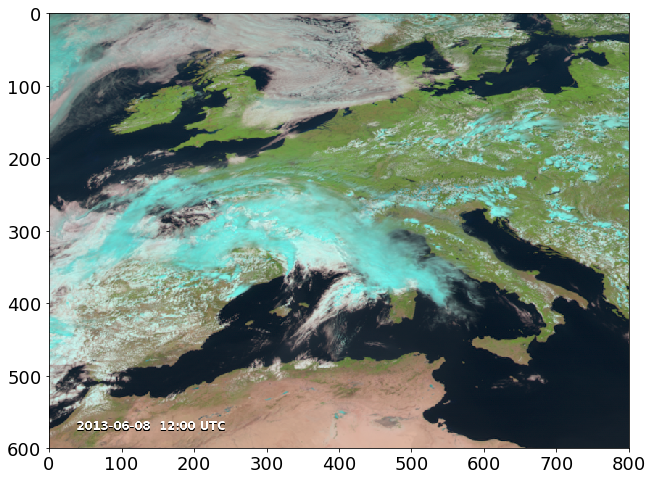

In [11]:
rgb = np.array( s.images['pytroll_nc'] )
plt.imshow(rgb)

## Adjusting Region Configuration

In [12]:
region = ((216, 456), (1676, 2076))
s = MSeviRGB(time = time, region = region, scan_type = scan_type, tstamp = False)

Region suggests use of hdf file


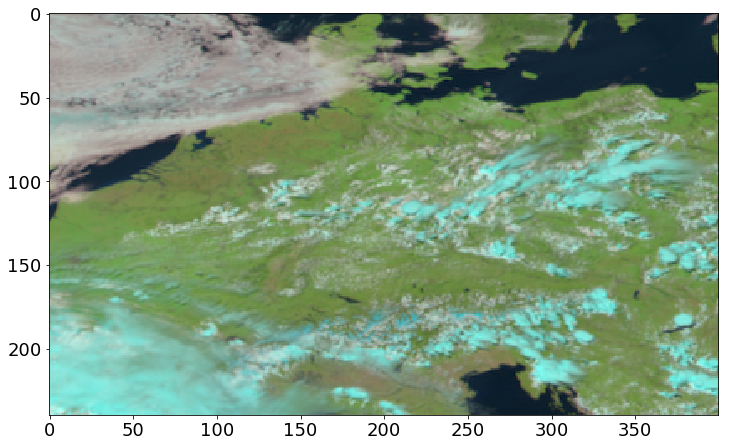

In [13]:
rgb = np.array( s.images['pytroll_nc'] )
plt.imshow(rgb)

## Loop over several RGBs

['IR_016', 'VIS008', 'VIS006'] is already loaded!
['IR_016', 'VIS008', 'VIS006', 'HRV'] is already loaded!
['IR_108'] is already loaded!
['WV_062', 'WV_073', 'IR_097', 'IR_108'] is already loaded!
['IR_087', 'IR_108', 'IR_120'] is already loaded!
['WV_062', 'WV_073', 'IR_039', 'IR_016', 'IR_108', 'VIS006'] is already loaded!
['IR_108', 'HRV'] is already loaded!


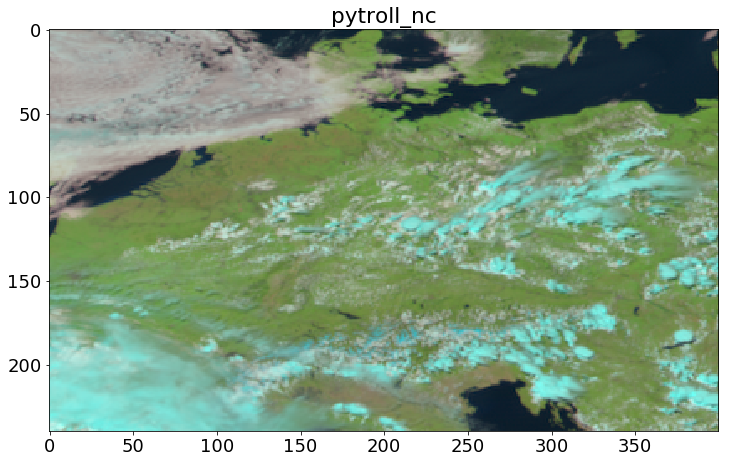

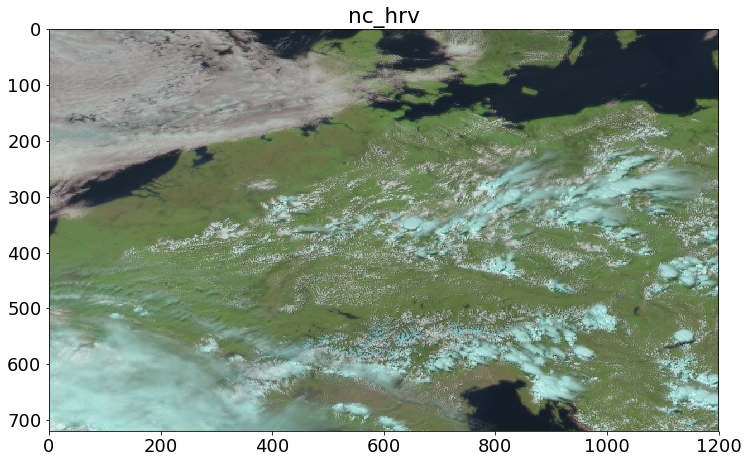

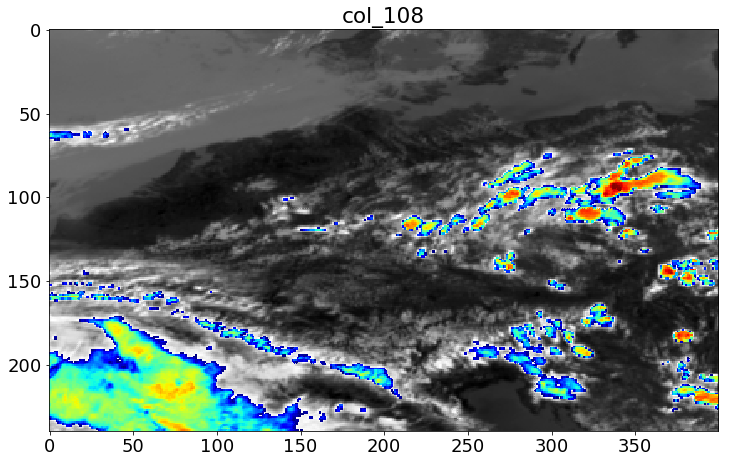

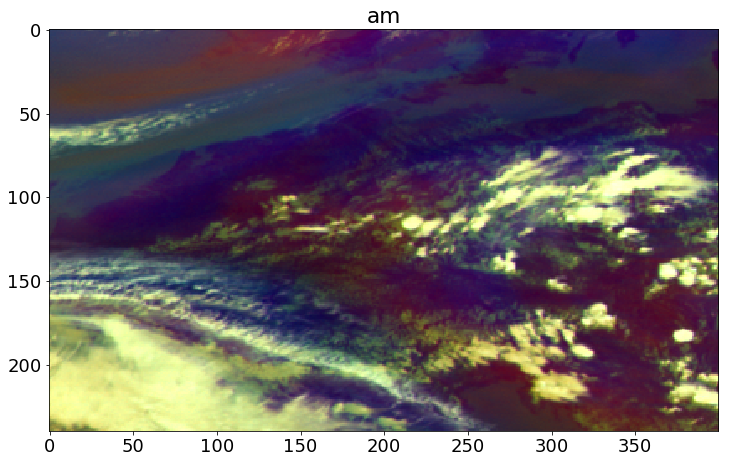

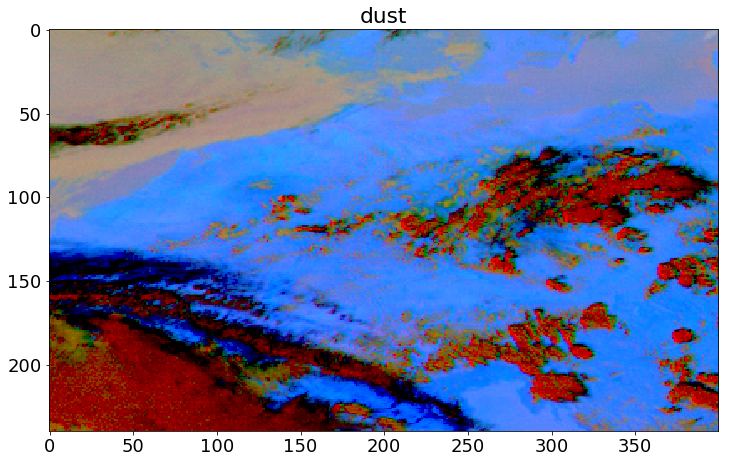

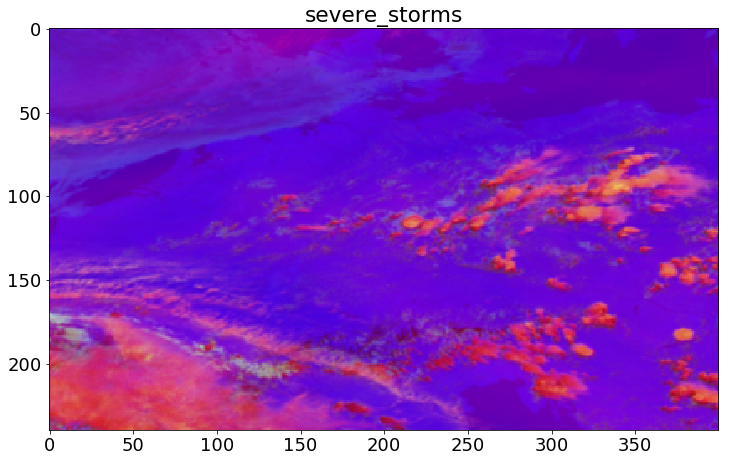

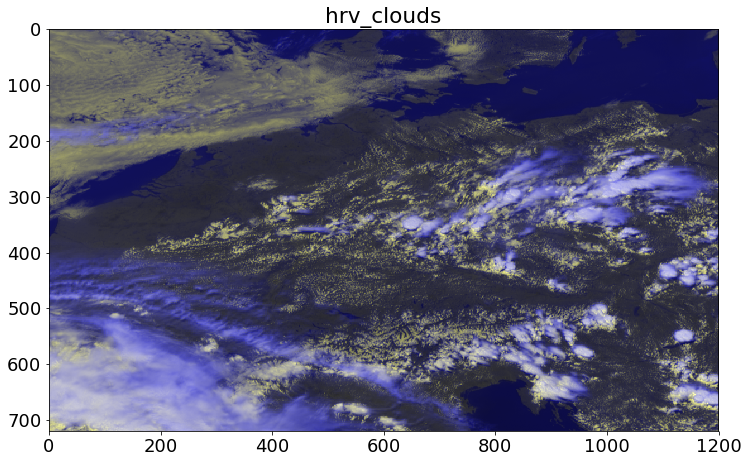

In [16]:
rgb_list = ['pytroll_nc',  'nc_hrv', 'col_108', 'am', 'dust', 'severe_storms', 'hrv_clouds']

for rgbname in rgb_list:
    plt.figure()
    s.create_rgb(rgbname, tstamp=False)
    rgb = np.array( s.images[rgbname] )
    plt.imshow(rgb)
    plt.title(rgbname)